# TDW 3311 Lab Assignment

### Group Name: TechTitans
#### Group Members:
- LIM FANG WEI (1211306646)
- HOW SHUE KEI (1201103432)	
- KOW WAN XUAN (1211307650)	
- HO JUN WEI (1211306530)

## Part 2- Feature Selection (5 Marks)
Please perform the following tasks using Dataset2:\
[Hint: you may refer to lab 6 to use a ready dataset by imputing the missing data with median]


Perform Feature Selection as follows:
- Apply a forward selection by using linear regression, set k_features = 4. Record the selected features.
- Apply a Filter method by using correlation. Select features with correlation > 0.5. Record the selected features.
- Apply an embedded method by using Lasso Regression. Record the selected features.

In [1]:
import pandas as pd
import numpy as np
df2 = pd.read_csv('Dataset2.data', sep=",", header=None)
df2.columns = [
    "ID",
    "Clump_Thickness",
    "Uniformity_CellSize",
    "Uniformity_CellShape",
    "Marginal_Adhesion",
    "Single_Epithelial",
    "Bare_Nuclei",
    "Bland_Chromatin", 
    "Normal_Nucleoli", 
    "Mitoses",
    "Classes"
]
display(df2)
df2.describe()

,ID,Clump_Thickness,Uniformity_CellSize,Uniformity_CellShape,Marginal_Adhesion,Single_Epithelial,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Classes
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


,ID,Clump_Thickness,Uniformity_CellSize,Uniformity_CellShape,Marginal_Adhesion,Single_Epithelial,Bland_Chromatin,Normal_Nucleoli,Mitoses,Classes
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


0. Perform missing data handling.
[Hint: you may refer to lab 6 to use a ready dataset by inputing the missing data with median]

In [2]:
df2 = df2.replace('?', np.NaN)

print('\nNumber of instances = %d' % (df2.shape[0]))  #rows = instances
print('Number of attributes = %d' % (df2.shape[1]))  #columns= attributes

print('Number of missing values:')
for col in df2.columns:
    print('\t%s: %d' % (col,df2[col].isna().sum()))


Number of instances = 699
Number of attributes = 11
Number of missing values:
	ID: 0
	Clump_Thickness: 0
	Uniformity_CellSize: 0
	Uniformity_CellShape: 0
	Marginal_Adhesion: 0
	Single_Epithelial: 0
	Bare_Nuclei: 16
	Bland_Chromatin: 0
	Normal_Nucleoli: 0
	Mitoses: 0
	Classes: 0


In [3]:
#Dropping ID column as it is unnecessary
df2 = df2.drop('ID', axis=1)

# Inputting missing data with median
df2.Bare_Nuclei.fillna(df2.Bare_Nuclei.median(), inplace = True)
df2['Bare_Nuclei'].isnull().sum() #now no more missing values for column Bare_Nuclei

0

In [4]:
display(df2)

,Clump_Thickness,Uniformity_CellSize,Uniformity_CellShape,Marginal_Adhesion,Single_Epithelial,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Classes
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


1. Perform Feature Selection as follows:
   
- Apply a forward selection by using linear regression, set k_features = 4. Record the 
selected features.


In [5]:
# If mlxtend does not exist, execute command `conda install -c conda-forge mlxtend` from Anaconda Prompt.

# Import modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [6]:
x = df2.drop('Classes', axis=1) 
y = df2['Classes']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=0)

LR = LinearRegression()
step_forward = sfs(LR, k_features=4, forward=True, floating=False, scoring='r2', verbose=2, cv=5)
step_forward = step_forward.fit(X_train, Y_train)
selected_features = list(step_forward.k_feature_names_)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2023-09-09 11:43:20] Features: 1/4 -- score: 0.6650937016551939[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished

[2023-09-09 11:43:20] Features: 2/4 -- score: 0.7922727175578442[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished

[2023-09-09 11:43:21] Features: 3/4 -- score: 0.8162013182254665[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [7]:
# Record the selected features.
print(f"Selected features are: {selected_features}")

Selected features are: ['Clump_Thickness', 'Uniformity_CellSize', 'Bare_Nuclei', 'Normal_Nucleoli']


- Apply a Filter method by using correlation. Select features with correlation > 0.5. 
Record the selected features.


In [8]:
# Import modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Fang\AppData\Local\Temp\ipykernel_11140\3944282271.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df2.corr()


<Axes: >

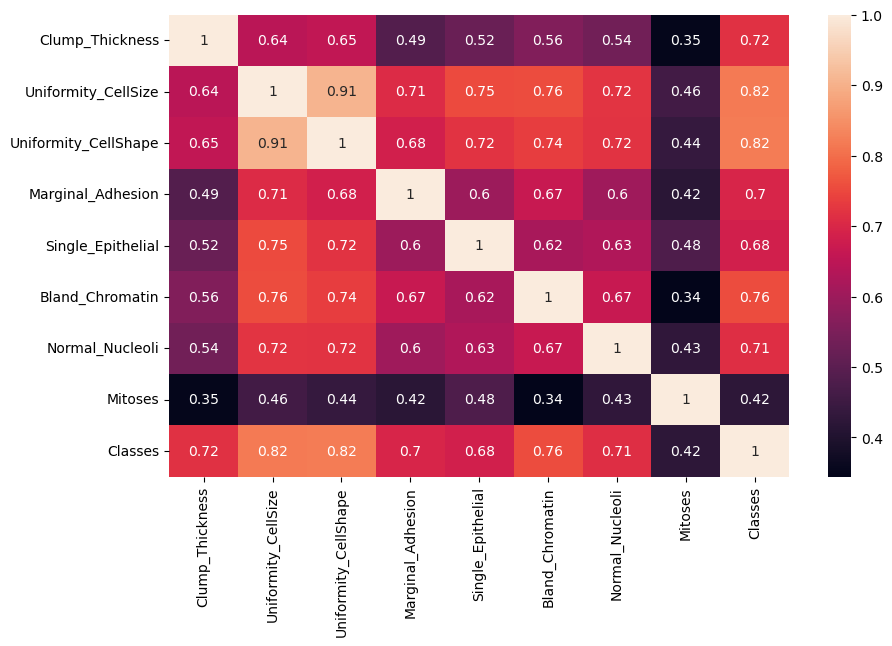

In [9]:
# Visualize the correlation using heat map.
cor = df2.corr()
plt.figure(figsize = (10,6))
sns.heatmap(cor, annot=True)

In [10]:
# Record the selected features.
threshold = 0.5
s = abs(cor['Classes'])

selectedFeature = s[s > 0.5].drop(['Classes'])
print(f"The selected features, along with their correlation, are: \n{selectedFeature}")

The selected features, along with their correlation, are: 
Clump_Thickness         0.716001
Uniformity_CellSize     0.817904
Uniformity_CellShape    0.818934
Marginal_Adhesion       0.696800
Single_Epithelial       0.682785
Bland_Chromatin         0.756616
Normal_Nucleoli         0.712244
Name: Classes, dtype: float64


• Apply an embedded method by using Lasso Regression. Record the selected features

Best alpha using built-in LassoCV: 0.042826
Best score using built-in LassoCV: 0.838155

Clump_Thickness         0.061252
Uniformity_CellSize     0.049902
Uniformity_CellShape    0.033403
Marginal_Adhesion       0.009695
Single_Epithelial       0.007558
Bare_Nuclei             0.094444
Bland_Chromatin         0.035341
Normal_Nucleoli         0.035485
Mitoses                 0.000000
dtype: float64


Text(0.5, 1.0, 'Feature importance using Lasso Model')

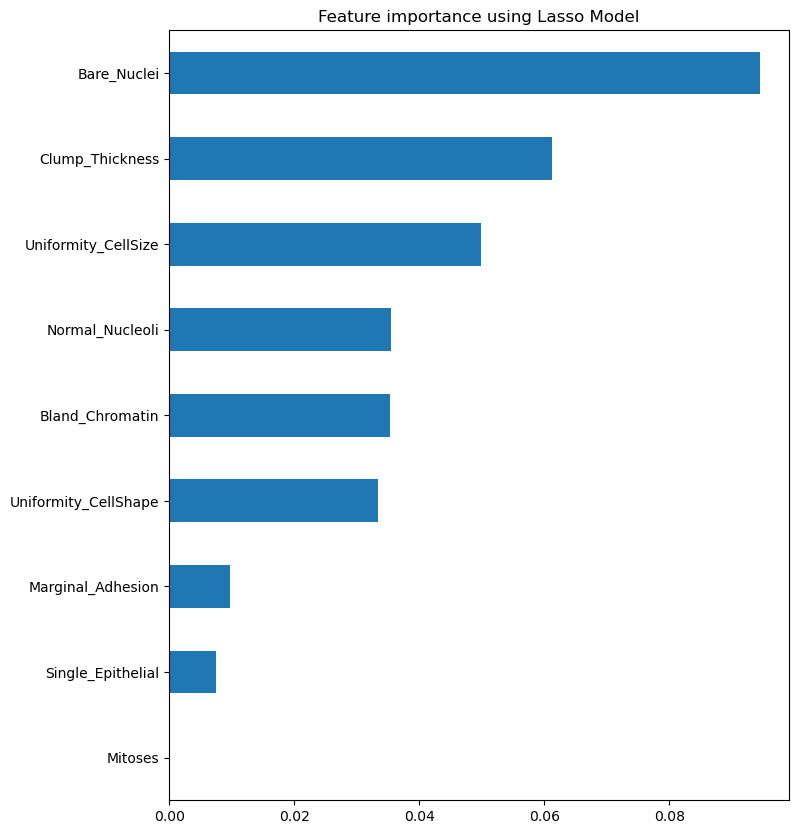

In [11]:
from sklearn.linear_model import LassoCV
reg = LassoCV()
reg.fit(x,y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" % reg.score(x,y))
coef=pd.Series(reg.coef_, index=x.columns)
print(f"\n{coef}")

# The plot figure below shows which features are selected
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [12]:
print("Lasso picked " + str(sum(coef != 0))+" variables and eliminated the other " + str(sum(coef == 0)) + " variables.\n")
print(f"The selected features are: \n{coef[coef != 0]}")

Lasso picked 8 variables and eliminated the other 1 variables.

The selected features are: 
Clump_Thickness         0.061252
Uniformity_CellSize     0.049902
Uniformity_CellShape    0.033403
Marginal_Adhesion       0.009695
Single_Epithelial       0.007558
Bare_Nuclei             0.094444
Bland_Chromatin         0.035341
Normal_Nucleoli         0.035485
dtype: float64
